In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
houses = pd.read_table('AmesHousing_1.txt',sep='\t')

In [2]:
A = np.array([4,4,4,4])
B = np.array([0,8,0,8])

In [3]:
print(A.mean())
print(B.mean())

4.0
4.0


### Measure of Variability (Range)

To **measure the variability**/**range** of a distribution :

* to find the difference between the maximum and the minimum value.

<center>
$max(A) - min(A)$

$max(B) - max(B)$

$range(X) = max(X) - min(X)$
</center>

In [4]:
def todict(row):
    range_dict = {}
    range_dict[row['Yr Sold']] = row['SalePrice']
    return range_dict

In [5]:
range_by_year = houses.groupby('Yr Sold')['SalePrice'].\
apply(lambda x: x.max() - x.min()).reset_index().\
apply(todict,axis=1)
        

In [6]:
range_by_year.tolist()

[{2006: 590000},
 {2007: 715700},
 {2008: 601900},
 {2009: 575100},
 {2010: 598868}]

In [7]:
def find_range(arr):
    return arr.max() - arr.min()

In [8]:
range_by_year = {}
for i in houses['Yr Sold'].unique():
    filter_df = houses[houses['Yr Sold']==i]
    range_by_year[i]=find_range(filter_df['SalePrice'])
    

In [9]:
range_by_year

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}

In [10]:
for k,v in range_by_year.items():
    print(k,v)

2010 598868
2009 575100
2008 601900
2007 715700
2006 590000


### Average Distance


<center>
average distance = $\large \frac{(x_1-\mu)+(x_2-\mu)+...+(x_n-\mu)}{N}$
</center>
<br>
<center>
= $\large \frac{\sum_{i=1}^n(x_i - \mu)}{N}$
</center>

In [11]:
def average_distance(arr):
    mean = np.mean(arr)
    lst = []
    for value in arr:
        lst.append(value-mean)
    return np.mean(lst)

In [12]:
C = [1,1,1,1,1,1,1,1,1,21]

In [13]:
avg_distance = average_distance(C)
avg_distance

0.0

### Mean Absolute Deviation @ Average Absolute Deviation

<center>
mean absolute distance = $\large \frac{|x_1-\mu|+|x_2-\mu|+...+|x_n-\mu|}{N}$
</center>
<br>
<center>
= $\large \frac{\sum_{i=1}^n|x_i - \mu|}{N}$
</center>

In [14]:
def mean_distance(arr):
    mean = np.mean(arr)
    lst = []
    for i in arr:
        lst.append(abs(i-mean))
    return np.mean(lst)

In [15]:
mad = mean_distance(C)
mad

3.6

### Variance

measure of variability is sometimes called mean squared distance or mean squared deviation (remember that "distance" and "deviation" are synonymous in this context). However, it's more commonly known as variance.

<center>
variance = mean squared distance = $\large \frac{(x_1-\mu)^2+(x_2-\mu)^2+...+(x_n-\mu)^2}{N}$
</center>
<br>
<center>
= $\large \frac{\sum_{i=1}^N(x_i - \mu)^2}{N}$
</center>

**Squaring the distances** or **taking their absolute values** ensure that we get a **variability value that is greater than 0** for all distributions that show some variability. 

> Notice, however, that variance and mean absolute deviation will still be 0 for distributions that show no variability.

In [16]:
D = [2,2,2,2]

In [17]:
mean_distance(D)

0.0

In [18]:
def variance_distance(arr):
    mean = np.mean(arr)
    lst = []
    for i in arr:
        mean_squared = (i-mean)**2
        lst.append(mean_squared)
    return np.mean(lst)

In [19]:
variance_distance(C)

36.0

### Standard Deviation
The standard deviation gives us a picture about this variability around the mean 

<br/>

<center>
standard deviation= $\large \sqrt\frac{(x_1-\mu)^2+(x_2-\mu)^2+...+(x_n-\mu)^2}{N}$
</center>
<br>
<center>
= $\large \sqrt \frac{\sum_{i=1}^N(x_i - \mu)^2}{N}$
</center>

In [22]:
# from math import sqrt
C = [1,1,1,1,1,1,1,1,1,21]

In [24]:
def sd_distance(arr):
    variance_list = []
    mean = np.mean(arr)
    for i in arr:
        squared = (i - mean)**2
        variance_list.append(squared)
    variance = np.mean(variance_list)
    return np.sqrt(variance)
        

In [25]:
sd_distance(C)

6.0

In [26]:
sd_distance(houses['SalePrice'])

79873.05865192253

In [27]:
np.mean(houses['SalePrice'])

180796.0600682594

### Average Variability Around the Mean

The standard deviation doesn't set boundaries for the values in a distribution


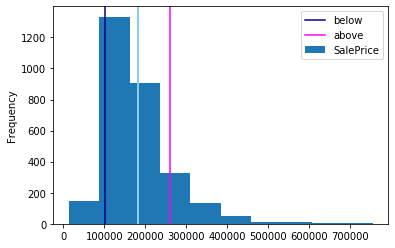

In [41]:
houses['SalePrice'].plot.hist()
below = np.mean(houses['SalePrice']) - np.std(houses['SalePrice'])
above = np.mean(houses['SalePrice']) + np.std(houses['SalePrice'])
plt.axvline(houses['SalePrice'].mean(),c='skyblue',lw=2)
plt.axvline(below,c='darkblue',label='below')
plt.axvline(above,c='fuchsia',label='above')
plt.legend()
plt.show()

In [48]:
# Lowest Variability , Greatest Variability by year 
year_std = {}
for year in houses['Yr Sold'].unique():
    df = houses[houses['Yr Sold']==year]
    year_std[year]=np.std(df['SalePrice'])


In [51]:
year_std

{2010: 74521.920711871,
 2009: 80794.39070298368,
 2008: 75531.94622558323,
 2007: 82483.28433288912,
 2006: 82553.57563561312}

In [50]:
max(year_std,key=year_std.get)

2006

In [52]:
min(year_std,key=year_std.get)

2010

### Measure of Spread

In [53]:
sample1 = houses['Year Built'].sample(50, random_state = 1)
sample2 = houses['Year Built'].sample(50, random_state = 2)

(array([ 1.,  1.,  1.,  7.,  3.,  6.,  6.,  8.,  3., 14.]),
 array([1880. , 1892.8, 1905.6, 1918.4, 1931.2, 1944. , 1956.8, 1969.6,
        1982.4, 1995.2, 2008. ]),
 <a list of 10 Patch objects>)

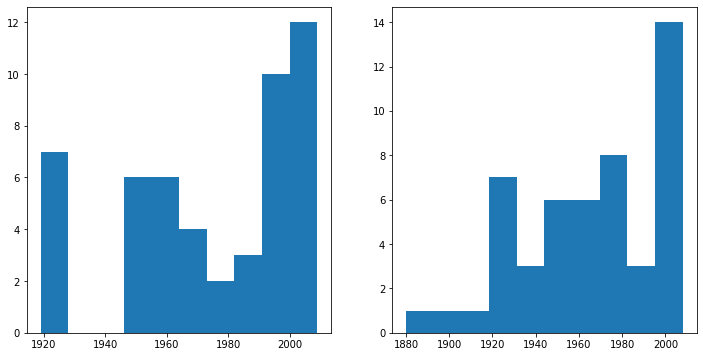

In [58]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(sample1)
plt.subplot(1,2,2)
plt.hist(sample2)

### Sample Standard Deviation

<center>
$\large SD_{sample}$= $\large \sqrt\frac{(x_1-\bar{x})^2+(x_2-\bar{x})^2+...+(x_n-\bar{x})^2}{n}$
</center>
<br>
<center>
= $\large \sqrt \frac{\sum_{i=1}^n(x_i - \bar{x})^2}{n}$
</center>

In [60]:
std_list = []
for i in range(5000):
    data = houses['SalePrice'].sample(10,random_state=i)
    std_list.append(np.std(data))


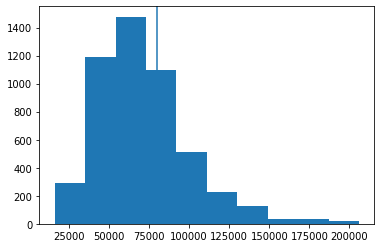

In [61]:
plt.hist(std_list)
plt.axvline(houses['SalePrice'].std())

most sample standard deviations are clustered below the population standard deviation

In [67]:
# mean of the 5000 sample standard deviations is below the population standard deviation
print(sum(std_list)/5000)
print(houses['SalePrice'].std())

71303.64762671624
79886.692356665


sample standard deviation underestimates on average the population standard deviation. Some sample standard deviations are lower than the population standard deviation, some are greater, some may even be equal to the population standard deviation, but on average the sample standard deviation is lower than the population standard deviation.

We can get a good intuition for why the sample standard deviation underestimates if we think in terms of distribution spread. When we sample a population, it's generally more likely to get a sample with a spread that's lower than the population's spread. This generally translates to a lower standard deviation than in the population.

<img src="img/s2m4_less_var.svg">

Getting a sample with a higher standard deviation than in the population is possible, but this is less likely. This is mostly specific to samples with a high spread and no clusters.

<img src='img/s2m4_more_var.svg'>

### Sample Standard Deviation , Bessel Correction

<br>
<center>
$\large SD_{sample}$= $\large \sqrt\frac{(x_1-\bar{x})^2+(x_2-\bar{x})^2+...+(x_n-\bar{x})^2}{n-1}$
</center>
<br>
<center>
= $\large \sqrt \frac{\sum_{i=1}^n(x_i - \bar{x})^2}{n-1}$
</center>


### Standard Notation



<img src="img/s2m4_bessel.png">

* mean of the 5000 sample standard deviations without Bessel's correction is roughly 71304, 

* the mean standard deviation of the sample standard deviations having the correction is roughly 75161. 

> This is significantly closer to the population standard deviation, which is approximately 79873.

* Population

    * Population Standard Deviation
<br>
<center>
$\large \sigma$= $\large \sqrt\frac{(x_1-\bar{x})^2+(x_2-\bar{x})^2+...+(x_n-\bar{x})^2}{n-1}$
</center>
<br>
    
    * Population Variance
    
<center>
$\large \sigma^2$= $\large \sqrt \frac{\sum_{i=1}^n(x_i - \bar{x})^2}{n-1}$
</center>

* Sample

    * Sample Standard Deviation
<br>
<center>
$\large s$= $\large \sqrt\frac{(x_1-\bar{x})^2+(x_2-\bar{x})^2+...+(x_n-\bar{x})^2}{n-1}$
</center>
<br>

    * Sample Variance
    
<center>
$\large s^2$= $\large \sqrt \frac{\sum_{i=1}^n(x_i - \bar{x})^2}{n-1}$
</center>

In [70]:
sample = houses.sample(100, random_state = 1)
from numpy import std, var